# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = url + '&appid=' + str(weather_api_key) + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinabang
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | bardai
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | flying fish cove
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | st. john's
Processing Record 8 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 9 of Set 1 | selfoss
Processing Record 10 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | aasiaat
Processing Record 13 of Set 1 | yamada
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | coahuayana de hidalgo
Processing Record 16 of Set 1 | lhokseumawe
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | puerto lempira
Processing Record

Processing Record 37 of Set 4 | chu
Processing Record 38 of Set 4 | broken hill
Processing Record 39 of Set 4 | mazagao
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | sofifi
City not found. Skipping...
Processing Record 42 of Set 4 | kokoda
Processing Record 43 of Set 4 | invercargill
Processing Record 44 of Set 4 | fernley
Processing Record 45 of Set 4 | tsiombe
Processing Record 46 of Set 4 | akureyri
Processing Record 47 of Set 4 | yemva
Processing Record 48 of Set 4 | rubtsovsk
Processing Record 49 of Set 4 | tvoroyri
Processing Record 0 of Set 5 | altai
Processing Record 1 of Set 5 | batticaloa
Processing Record 2 of Set 5 | road town
Processing Record 3 of Set 5 | ad dilam
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 of Set 5 | yichang
Processing Record 6 of Set 5 | khatra
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | muna
Processing Record 9 of Set 5 | flin flon
Processing Record 10 of Set 5 | broome
Processing Re

Processing Record 29 of Set 8 | tete
Processing Record 30 of Set 8 | baillif
Processing Record 31 of Set 8 | charlottetown
Processing Record 32 of Set 8 | yung shue wan
Processing Record 33 of Set 8 | soverato marina
Processing Record 34 of Set 8 | roslavl'
Processing Record 35 of Set 8 | hauterive
Processing Record 36 of Set 8 | yaren
Processing Record 37 of Set 8 | sur
Processing Record 38 of Set 8 | codrington
Processing Record 39 of Set 8 | kencong
Processing Record 40 of Set 8 | assab
Processing Record 41 of Set 8 | yelovo
Processing Record 42 of Set 8 | lincoln city
Processing Record 43 of Set 8 | zilair
Processing Record 44 of Set 8 | bunia
Processing Record 45 of Set 8 | gizo
Processing Record 46 of Set 8 | mahdia
Processing Record 47 of Set 8 | chernyshevskiy
Processing Record 48 of Set 8 | al jawf
Processing Record 49 of Set 8 | ahmetli
Processing Record 0 of Set 9 | inirida
Processing Record 1 of Set 9 | pandan
Processing Record 2 of Set 9 | lautoka
Processing Record 3 of Se

Processing Record 18 of Set 12 | thunder bay
Processing Record 19 of Set 12 | kotido
Processing Record 20 of Set 12 | ha giang
Processing Record 21 of Set 12 | shiyan
Processing Record 22 of Set 12 | haimen
Processing Record 23 of Set 12 | hirara
Processing Record 24 of Set 12 | uturoa
Processing Record 25 of Set 12 | waren
Processing Record 26 of Set 12 | molde
Processing Record 27 of Set 12 | ternate
Processing Record 28 of Set 12 | puerto leguizamo
Processing Record 29 of Set 12 | gemena
Processing Record 30 of Set 12 | medina de pomar
Processing Record 31 of Set 12 | kardzhali
Processing Record 32 of Set 12 | sinop
Processing Record 33 of Set 12 | al artawiyah
Processing Record 34 of Set 12 | yangchun
Processing Record 35 of Set 12 | vicente guerrero
Processing Record 36 of Set 12 | anadyr
Processing Record 37 of Set 12 | lebu
Processing Record 38 of Set 12 | timimoun
Processing Record 39 of Set 12 | bucerias
Processing Record 40 of Set 12 | arno
Processing Record 41 of Set 12 | ta

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df['Max Temp'] = city_data_df['Max Temp']-272.15 #convert temperature to Celcius
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sinabang,2.4803,96.3801,28.01,85,92,3.04,ID,1683842407
1,bardai,11.6500,7.2333,31.51,37,96,3.89,NG,1683842408
2,bilibino,68.0546,166.4372,2.21,97,100,2.30,RU,1683842410
3,flying fish cove,-10.4217,105.6791,27.82,89,100,6.17,CX,1683842411
4,longyearbyen,78.2186,15.6401,-3.09,80,75,5.66,SJ,1683842411


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,28.01,85,92,3.04,ID,1683842407
1,bardai,11.6500,7.2333,31.51,37,96,3.89,NG,1683842408
2,bilibino,68.0546,166.4372,2.21,97,100,2.30,RU,1683842410
3,flying fish cove,-10.4217,105.6791,27.82,89,100,6.17,CX,1683842411
4,longyearbyen,78.2186,15.6401,-3.09,80,75,5.66,SJ,1683842411


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

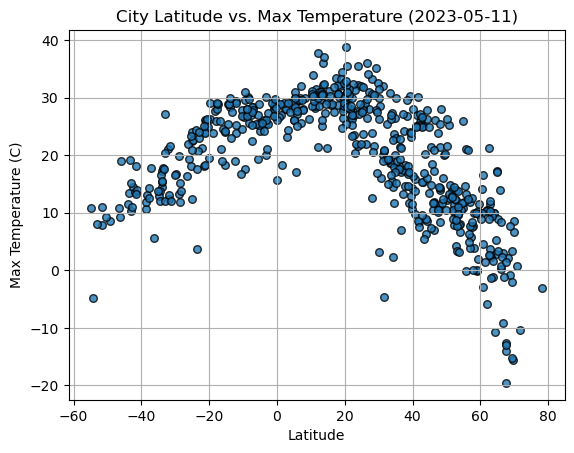

In [11]:
#Convert Date column
from datetime import datetime
unix = int(city_data_df['Date'][0])
dttime = datetime.utcfromtimestamp(unix).strftime('%Y-%m-%d')

# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
city_data_df.plot.scatter(x = "Lat", y = 'Max Temp', grid = True, title = f'City Latitude vs. Max Temperature ({dttime})',
                         xlabel = 'Latitude', ylabel = 'Max Temperature (C)', edgecolor = 'black', s = 30, alpha = 0.8)

# Save the figure
plt.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

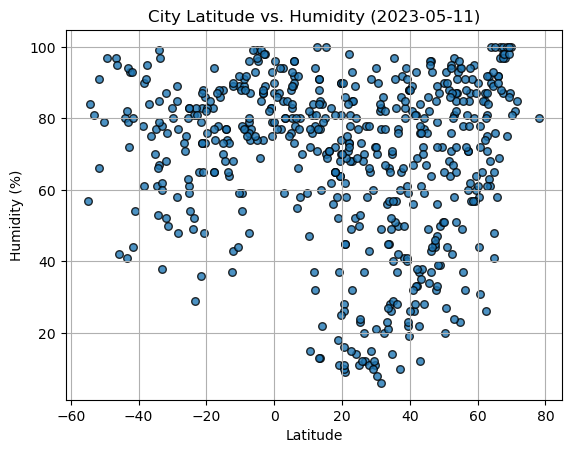

In [12]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
city_data_df.plot.scatter(x = "Lat", y = 'Humidity', grid = True, title = f'City Latitude vs. Humidity ({dttime})',
                         xlabel = 'Latitude', ylabel = 'Humidity (%)', edgecolor = 'black', s = 30, alpha = 0.8)

# Save the figure
plt.savefig("output_data/Fig2.png")

#### Latitude Vs. Cloudiness

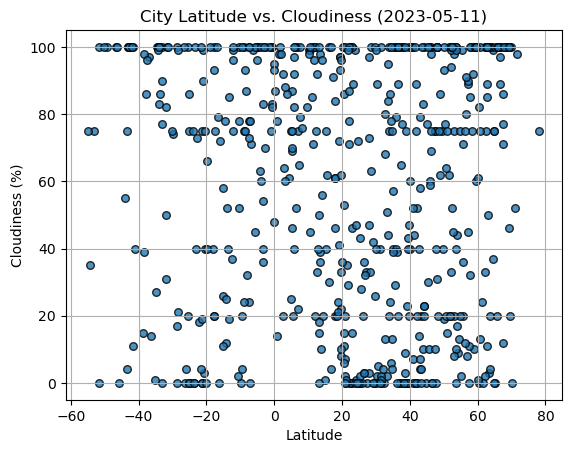

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
city_data_df.plot.scatter(x = "Lat", y = 'Cloudiness', grid = True, title = f'City Latitude vs. Cloudiness ({dttime})',
                         xlabel = 'Latitude', ylabel = 'Cloudiness (%)', edgecolor = 'black', s = 30, alpha = 0.8)

# Save the figure
plt.savefig("output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

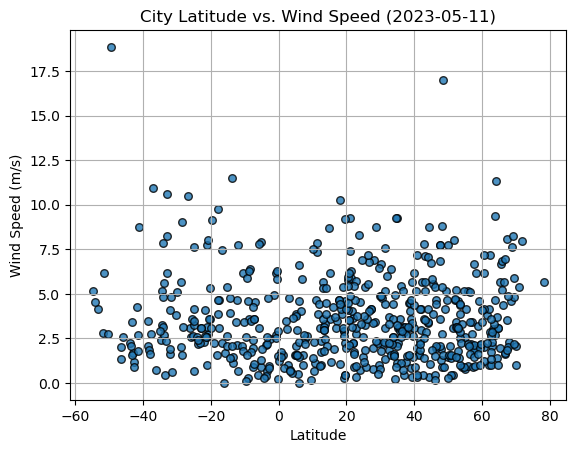

In [14]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
city_data_df.plot.scatter(x = "Lat", y = 'Wind Speed', grid = True, title = f'City Latitude vs. Wind Speed ({dttime})',
                         xlabel = 'Latitude', ylabel = 'Wind Speed (m/s)', edgecolor = 'black', s = 30, alpha = 0.8)

# Save the figure
plt.savefig("output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def reg(df,x,y,x_text,y_text):    
    lm = st.linregress(x = df[x], y = df[y])
    data_fit = lm[0]*df[x] + lm[1]
    fit_df = pd.DataFrame({'x': df[x], 'fitted': data_fit})
    ax = df.plot.scatter(y = y, x = x, s = 30)
    print(f"The r-value is: {lm[2]}")
    fit_df.plot.line(x = 'x', y = 'fitted', color = 'red', ax=ax, legend = None, xlabel = x)
    plt.text(x_text,y_text,f"y = {'%.2f' %lm[0]}x + {'%.1f' %lm[1]}", color = 'red', fontsize = 16)

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,28.01,85,92,3.04,ID,1683842407
1,bardai,11.6500,7.2333,31.51,37,96,3.89,NG,1683842408
2,bilibino,68.0546,166.4372,2.21,97,100,2.30,RU,1683842410
4,longyearbyen,78.2186,15.6401,-3.09,80,75,5.66,SJ,1683842411
5,st. john's,47.5649,-52.7093,10.66,44,75,7.72,CA,1683842327


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,flying fish cove,-10.4217,105.6791,27.82,89,100,6.17,CX,1683842411
10,puerto ayora,-0.7393,-90.3518,27.98,93,83,2.68,EC,1683842307
15,bengkulu,-3.8004,102.2655,26.06,85,60,2.15,ID,1683842438
18,avarua,-21.2078,-159.7750,26.03,83,75,7.72,CK,1683842294
19,adamstown,-25.0660,-130.1015,22.37,59,86,7.62,PN,1683842442


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8014961063470314


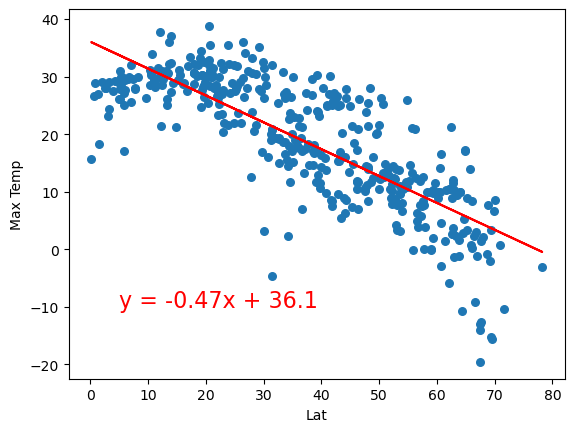

In [19]:
# Linear regression on Northern Hemisphere
import scipy.stats as st
reg(northern_hemi_df,'Lat','Max Temp',5,-10)

The r-value is: 0.813674516918385


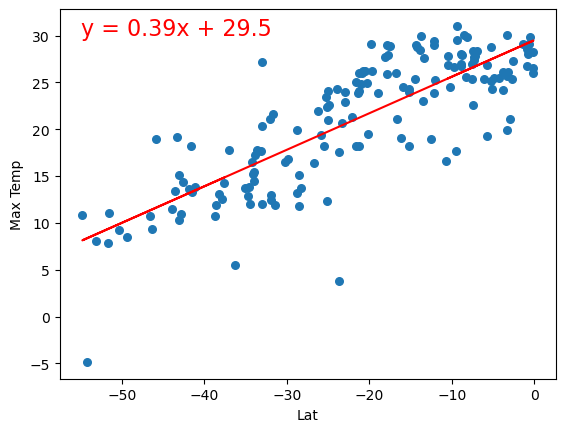

In [20]:
# Linear regression on Southern Hemisphere
reg(southern_hemi_df,'Lat','Max Temp',-55,30)

**Discussion about the linear relationship:** There is a strong linear relationship between Max Temp and latitude in both the northern and southern hemisphere. This correlation is positive for the southern hemishpere and negative for the northern, indicating that the max temperature decreases as one moves furhter away from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11107667455960313


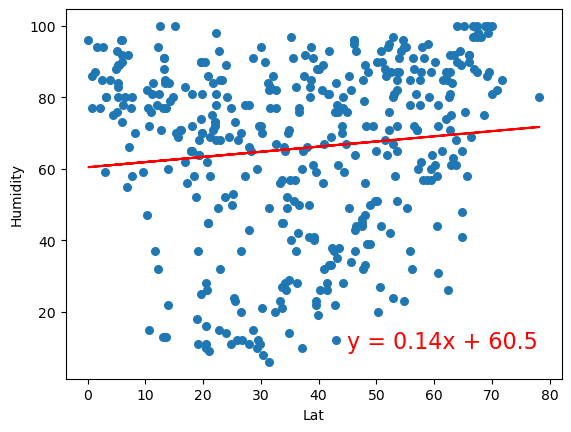

In [21]:
# Northern Hemisphere
reg(northern_hemi_df,'Lat','Humidity',45,10)

The r-value is: 0.16614076756472934


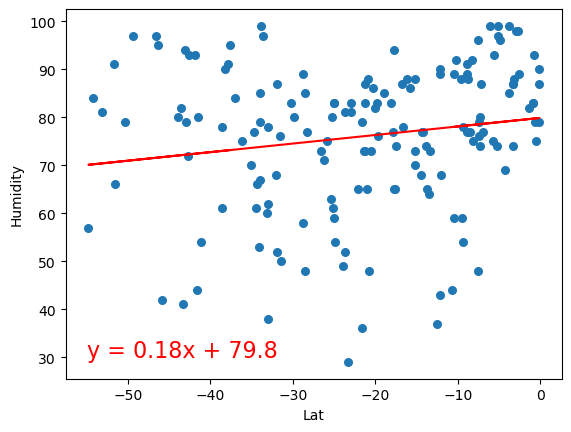

In [23]:
# Southern Hemisphere
reg(southern_hemi_df,'Lat','Humidity',-55,30)

**Discussion about the linear relationship:** There is very weak correlation between humidity and latitude indicated by the low r-values and small slope of the linear fit equation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03995380031997585


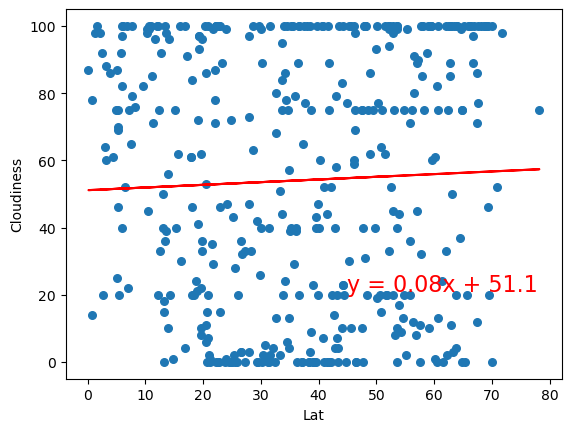

In [25]:
# Northern Hemisphere
reg(northern_hemi_df,'Lat','Cloudiness',45,21)

The r-value is: 0.029900646786040142


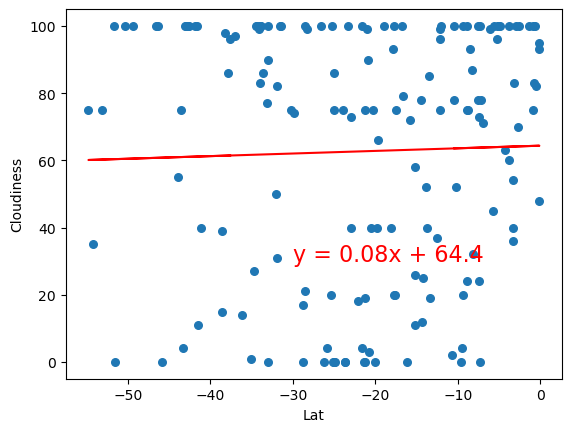

In [26]:
# Southern Hemisphere
reg(southern_hemi_df,'Lat','Cloudiness',-30,30)

**Discussion about the linear relationship:** There is little to no correlation between cloudiness and latitude indicated by the low r-values and the slope of the linear fit equation being nearly zero.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0786866954944698


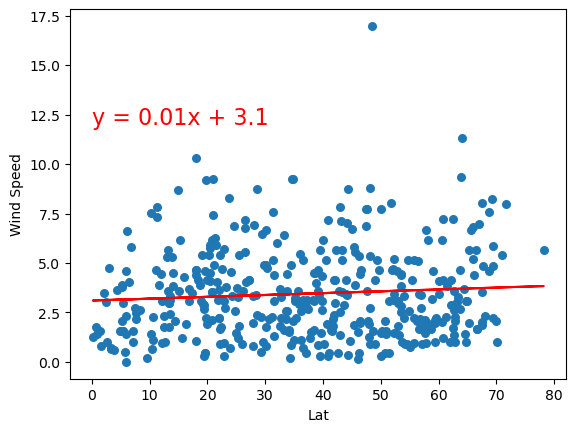

In [27]:
# Northern Hemisphere
reg(northern_hemi_df,'Lat','Wind Speed',0,12)

The r-value is: -0.13835562748627


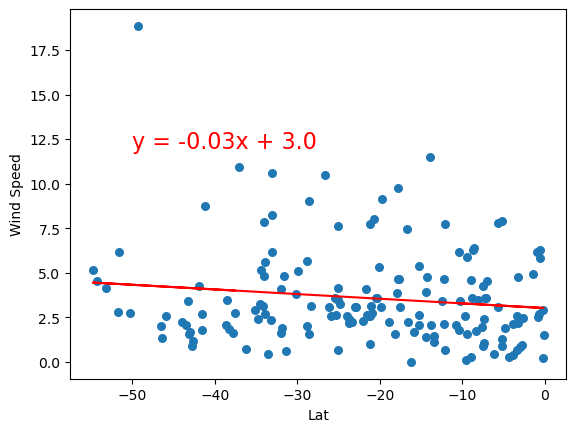

In [28]:
# Southern Hemisphere
reg(southern_hemi_df,'Lat','Wind Speed',-50,12)

**Discussion about the linear relationship:** There is little to no correlation between wind speed and latitude indicated by the low r-values and low slopes. There is some indication that wind speed increases with distance from the equator, but this could be due to the presence of outliers which may be locations in extreme climates.